## Importing the necessary libraries

In [3]:
#Data manipulation and handling and visualization libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#NMF
from sklearn.decomposition import NMF
# clustering library 
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [4]:
df=pd.read_csv('spotify.xls',index_col=0)

In [5]:
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [7]:
df.shape


(1000, 5000)

# Spotify Recommendation System

In [8]:
X= df.values
X

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

## Non Negative Matrix Factorization(NMF)

In [9]:
#n_components = Genres in the dataset, max_iter= number of iterations allowed
nmf=NMF(n_components=100,max_iter=1000,random_state=7)

In [10]:
nmf.fit(X)

NMF(max_iter=1000, n_components=100, random_state=7)

In [11]:
user_matrix = nmf.transform(X)
song_matrix = nmf.components_.T

In [12]:
user_matrix

array([[0.1498251 , 0.01384544, 0.00690669, ..., 0.00424868, 0.03405833,
        0.56559843],
       [0.11230092, 0.00373934, 0.01153803, ..., 0.        , 0.0754482 ,
        0.56943531],
       [0.18402189, 0.01214998, 0.02146472, ..., 0.10163133, 0.        ,
        0.37409568],
       ...,
       [0.        , 0.01277174, 0.01059529, ..., 0.        , 0.39799459,
        0.42441694],
       [0.        , 0.        , 0.00316957, ..., 0.        , 0.36112612,
        0.53190435],
       [0.23281929, 0.        , 0.00658895, ..., 0.        , 0.        ,
        0.59912398]])

In [13]:
songmatrix

NameError: name 'songmatrix' is not defined

In [67]:
user_matrix.shape

(1000, 100)

In [68]:
song_matrix.shape

(5000, 100)

## Steps for building a recommendation system - type1(For local library or small dataset)

1. Consider recomending song to the first user(row location 0 in user matrix)
2. Find the Euclidean Distance between this first user and the remaining 999 users
3. Find out top 10 songs heard by nearest 5 users.
4. Recommend this 10 songs to the first user.





## Calculating the distance between two users

In [69]:
def col_dist(u1,u2):
    return pow(sum(pow(u1[x]-u2[x],2)for x in range(len(u1))),0.5)

In [70]:
col_dist(user_matrix[0],user_matrix[1])

14.184381895944377

In [71]:
def dist_from_remaining_users(b_user,user_matrix):
    dist = []
    for i in range(len(user_matrix)):
        if b_user != i:
            dist.append(col_dist(user_matrix[b_user],user_matrix[i]))
    
    return dist

In [72]:
dist_user1 = dist_from_remaining_users(0,user_matrix)

In [73]:
dist_user1

[14.184381895944377,
 14.107735051435238,
 14.048481250262425,
 13.638912585829546,
 13.198096677408572,
 15.219290576123042,
 13.511031919086815,
 13.225996410068408,
 14.120041339811648,
 13.556222999780186,
 14.709769154691381,
 14.051448203836015,
 12.965333205574138,
 14.284533050124386,
 13.432757946666882,
 13.892349897408916,
 14.25266518965718,
 15.171404646500411,
 13.370066667303139,
 13.28950124398635,
 16.2743246343562,
 14.217201702437496,
 14.261534987906263,
 15.612743128844752,
 13.600740994616931,
 15.28319128899808,
 14.083788409573916,
 14.95485509883931,
 14.858306137537888,
 13.988957984196748,
 15.223408953338218,
 14.319065026682564,
 14.093880990331156,
 14.407220456340966,
 14.657082474259036,
 14.311659933692178,
 13.382062152032685,
 13.784363313586267,
 11.866706475438274,
 13.555175165055035,
 14.806301472271866,
 14.551358078073841,
 14.347346413050943,
 12.519122128453185,
 12.917944819222562,
 14.78862631323433,
 13.643612551382281,
 14.614450735526999,

In [74]:
len(dist_user1)

999

### Finding Nearest 5 Users


In [75]:
nearest_users = np.argsort(dist_user1)[:5]

In [76]:
for i in range(len(nearest_users)):
    nearest_users[i] += 1

In [77]:
nearest_users

array([830, 260,  72, 419, 147], dtype=int64)

Finding the most heared songs by these users

In [78]:
for i in nearest_users:
    print('Songs heared by user',i,'are:')
    temp=df.iloc[i]
    print(temp[temp.values !=0].index)
    

Songs heared by user 830 are:
Index(['song_1', 'song_2', 'song_3', 'song_5', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4660)
Songs heared by user 260 are:
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4703)
Songs heared by user 72 are:
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', leng

 Picking out top 10 songs from above list of songs

In [79]:
def topNsongs(nearest_users, df,N):
    temp = df.iloc[nearest_users]
    dict1 = temp.max().to_dict()
    #print(dict1)
    
# converting every key value pair into a tuple and swapping them for sorting purpose, End result is a list of 
# song and number of times heard tuple
    sorted_dict = sorted(dict1.items(),key=lambda keyvalue: (keyvalue[1],keyvalue[0]),reverse=True)[:N]
   # print(sorted_dict)
    return [x[0] for x in sorted_dict]
    #return 0

In [80]:
topNsongs(nearest_users, df, 15)

['song_998',
 'song_994',
 'song_984',
 'song_973',
 'song_972',
 'song_969',
 'song_967',
 'song_966',
 'song_963',
 'song_962',
 'song_942',
 'song_939',
 'song_922',
 'song_92',
 'song_918']

## Type 2 Recommendation System for larger data set 

- K means clustering

In [81]:
WCSS={}
for k in range(1,50):
    k_means = KMeans(n_clusters = k, max_iter = 1000).fit(song_matrix)
    WCSS[k]=k_means.inertia_
    #inertia measures how well a dataset was clustered by kmeans

In [82]:
WCSS

{1: 14203.336903560647,
 2: 14021.541369305301,
 3: 13886.71183561516,
 4: 13783.497053314386,
 5: 13695.071133888567,
 6: 13620.030644917057,
 7: 13553.500525449346,
 8: 13496.332379121504,
 9: 13448.65160521517,
 10: 13399.870708789449,
 11: 13365.994379105536,
 12: 13331.362969213193,
 13: 13301.948205434013,
 14: 13272.554714768994,
 15: 13239.822832590009,
 16: 13223.727919343304,
 17: 13203.04610511274,
 18: 13179.727627476865,
 19: 13157.309768246849,
 20: 13138.163914486877,
 21: 13124.813690797762,
 22: 13108.888406362803,
 23: 13093.91942181525,
 24: 13067.290271573564,
 25: 13054.579610877267,
 26: 13040.941924081973,
 27: 13020.343059005416,
 28: 13007.360271362413,
 29: 12990.653508847916,
 30: 12977.446856668392,
 31: 12968.298048448018,
 32: 12954.962848728708,
 33: 12939.251627124537,
 34: 12914.369090415277,
 35: 12906.666813508806,
 36: 12908.464761945603,
 37: 12887.95697875901,
 38: 12876.778257933796,
 39: 12861.188097661892,
 40: 12856.38624067916,
 41: 12845.1085

Text(0, 0.5, 'WCSS')

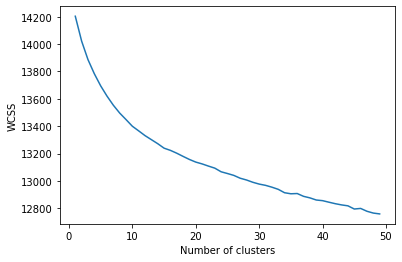

In [83]:
plt.plot(WCSS.keys(),WCSS.values())
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [84]:
def songs_in_cluster(N_clusters,df,song_matrix,song_name,n_recommendations):
    kmeans=KMeans(n_clusters=N_clusters,max_iter=1000).fit(song_matrix)
    index_in_song=df.columns.to_list().index(song_name)
    #print(index_in_song)
    song_vector=song_matrix[index_in_song]#song_vector =genre score of given song
    #print(song_vector)
    all_songs_in_cluster=kmeans.predict(song_matrix)
    #print(len(all_songs_in_cluster))
    
    
    
    #Finding songs which belongs to same cluster as of songs passed in song_name
    
    songs_in_selected_cluster=[X for X in range(len(all_songs_in_cluster))
                              if all_songs_in_cluster[X]==kmeans.predict([song_vector])]
    #print(len(songs_in_selected_cluster))
    song_cluster= song_matrix[songs_in_selected_cluster]
    
    #print(song_cluster)
    neighbors = NearestNeighbors(n_neighbors=n_recommendations)
    neighbors.fit(song_cluster)
    recommended_songs=neighbors.kneighbors([song_matrix[index_in_song]])
    #print(recommended_songs[1][0])
    
          
          
    songs=df.columns
    return [songs[X] for X in recommended_songs[1][0]]

In [85]:
songs_in_cluster(15,df,song_matrix,'song_5',5)

['song_1', 'song_98', 'song_264', 'song_146', 'song_92']